In [2]:
%load_ext autoreload

In [3]:
from matplotlib.animation import FuncAnimation, ArtistAnimation
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm

from ABF import AdaBoost, MLPClassifier

%matplotlib inline
%autoreload 2

In [4]:
plt.rcParams["figure.figsize"] = (10, 7)

In [5]:
x, y = make_blobs(200, n_features=2, centers=[[0, 2.5], [2.5, 0]], cluster_std=1.2)
# x, y = make_circles(1000, noise=0.1, factor=0.8)
y = (y - 0.5) * 2

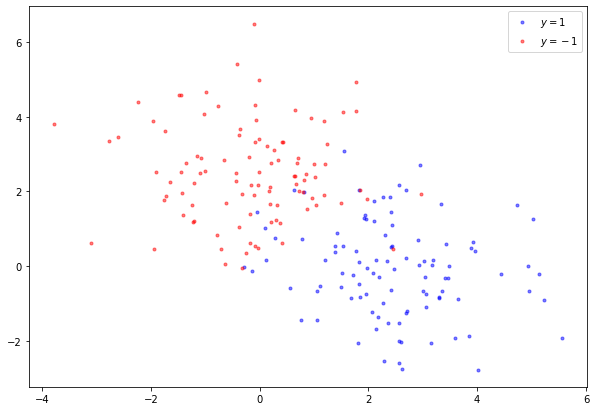

In [6]:
plt.plot(*x[y == 1].T, "b.", label="$y=1$", alpha=0.5)
plt.plot(*x[y == -1].T, "r.", label="$y=-1$", alpha=0.5)
plt.legend();
plt.show();

In [7]:
model1 = AdaBoost(num_learners=5)
model2 = AdaBoost(num_learners=25)
model3 = AdaBoost(num_learners=625)

model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

100%|██████████| 625/625 [00:05<00:00, 106.72it/s]


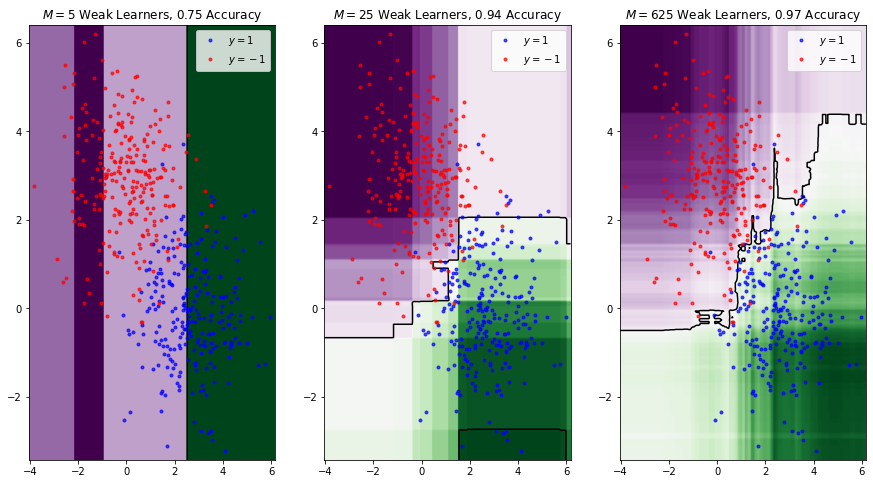

In [8]:
plt.figure(figsize=(15, 8))

margin = 0.2
xlist = np.linspace(x[:, 0].min() - margin, x[:, 0].max() + margin, 200)
ylist = np.linspace(x[:, 1].min() - margin, x[:, 1].max() + margin, 200)
X, Y = np.meshgrid(xlist, ylist)
x_star = np.array([X, Y]).reshape(2, -1).T

for i, model in enumerate((model1, model2, model3), start=1):
    plt.subplot(1, 3, i)

    plt.plot(*x[y == 1].T, "b.", label="$y=1$", alpha=0.7)
    plt.plot(*x[y == -1].T, "r.", label="$y=-1$", alpha=0.7)

    scores = model.predict(x)
    preds = np.ones_like(scores)
    preds[scores < 0] = -1

    Z = model.score(x_star).reshape(200, 200)
    plt.contour(X, Y, Z, levels=1, colors="black")
    plt.contourf(X, Y, Z, levels=400, cmap="PRGn")

    plt.legend()
    accuracy = (preds == y).sum() / len(y)
    plt.title(f"$M={len(model.learners)}$ Weak Learners, {accuracy:.2f} Accuracy")

In [7]:
f_x = np.ones((len(x), 3))
f_x[:, :2] = x
y[y==-1] = 0

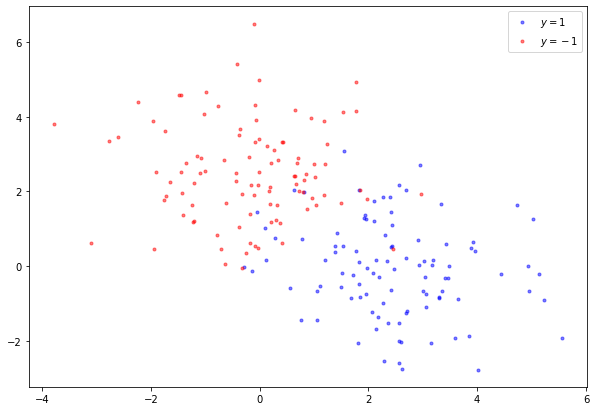

In [8]:
plt.plot(*x[y == 1].T, "b.", label="$y=1$", alpha=0.5)
plt.plot(*x[y == 0].T, "r.", label="$y=-1$", alpha=0.5)
plt.legend();

In [70]:
model1 = MLPClassifier(input_size=3, num_hidden=2, reg = 0.2)
model2 = MLPClassifier(input_size=3, num_hidden=5, reg = 0.2)
model3 = MLPClassifier(input_size=3, num_hidden=25, reg = 0.2)

# model1.fit(f_x, y, epochs=40000, lr=1)
model2.fit(f_x, y, epochs=160000, lr=1.2)
# model3.fit(f_x, y, epochs=640000, lr=1.2);

  3%|▎         | 4849/160000 [00:01<01:02, 2498.52it/s]


KeyboardInterrupt: 

In [8]:
plt.figure(figsize=(15, 8))

margin = 0.2
xlist = np.linspace(x[:, 0].min() - margin, x[:, 0].max() + margin, 200)
ylist = np.linspace(x[:, 1].min() - margin, x[:, 1].max() + margin, 200)
X, Y = np.meshgrid(xlist, ylist)
x_star = np.array([X, Y]).reshape(2, -1).T
f_x_star = np.ones((200 ** 2, 3))
f_x_star[:, :2] = x_star

for i, model in enumerate((model1, model2, model3), start=1):
    plt.subplot(1, 3, i)

    plt.plot(*x[y == 1].T, "b.", label="$y=1$", alpha=0.7)
    plt.plot(*x[y == 0].T, "r.", label="$y=0$", alpha=0.7)
    
    preds = model.predict(f_x)

    Z = model.forward(f_x_star)[1].reshape(200, 200)
    plt.contour(X, Y, Z, levels=1, colors="black")
    plt.contourf(X, Y, Z, levels=np.linspace(-.1, 1.1, 100), cmap="PRGn")

    plt.legend()
    accuracy = (preds == y).sum() / len(y)
    plt.title(f"$M={model.num_hidden}$ Hidden Layers, {accuracy:.3f} Accuracy")

NameError: name 'model1' is not defined

<Figure size 1080x576 with 0 Axes>

In [9]:
model = MLPClassifier(input_size=3, num_hidden=7, reg = 0.2)

In [10]:
margin = 0.2
xlist = np.linspace(x[:, 0].min() - margin, x[:, 0].max() + margin, 200)
ylist = np.linspace(x[:, 1].min() - margin, x[:, 1].max() + margin, 200)
X, Y = np.meshgrid(xlist, ylist)
x_star = np.array([X, Y]).reshape(2, -1).T
f_x_star = np.ones((200 ** 2, 3))
f_x_star[:, :2] = x_star
Z = model.forward(f_x_star)[1].reshape(200, 200)

Make an animation showing the mlp fitting to the data.

In [11]:
%matplotlib

Using matplotlib backend: MacOSX


In [16]:
model = MLPClassifier(input_size=3, num_hidden=15, reg=0.2)
fig, ax = plt.subplots()

y1_line = plt.plot(*x[y == 1].T, "b.", label="$y=1$", alpha=0.7)
y0_line = plt.plot(*x[y == 0].T, "r.", label="$y=0$", alpha=0.7)

In [17]:
num_frames = 10000

In [18]:
# Create the artists for each frame
def frame_generator(i):
    model.fit(f_x, y, 0.7, 50, False)
    ax.cla()
    Z = model.forward(f_x_star)[1].reshape(200, 200)
    cont = ax.contour(X, Y, Z, levels=1, colors="black")
    contf = ax.contourf(X, Y, Z, levels=np.linspace(-0.1, 1.1, 50), cmap="PRGn")
    y1_line = ax.plot(*x[y == 1].T, "b.", label="$y=1$", alpha=0.7)
    y0_line = ax.plot(*x[y == 0].T, "r.", label="$y=0$", alpha=0.7)
    print(f"{i}/{num_frames} frames")
    return [*y1_line, *y0_line, *cont.collections, *contf.collections]

In [19]:
%%time
# Save it. Note that you need to have ffmpeg installed
anim = FuncAnimation(
    fig,
    func=frame_generator,
    interval=100,
    blit=True,
    frames=num_frames,
    repeat=False,
)
anim.save("mlp-fit.mp4", dpi=200, fps=20)
anim._stop()

0/10000 frames
0/10000 frames
1/10000 frames
2/10000 frames
3/10000 frames
4/10000 frames
5/10000 frames
6/10000 frames
7/10000 frames
8/10000 frames
9/10000 frames
10/10000 frames
11/10000 frames
12/10000 frames
13/10000 frames
14/10000 frames
15/10000 frames
16/10000 frames
17/10000 frames
18/10000 frames
19/10000 frames
20/10000 frames
21/10000 frames
22/10000 frames
23/10000 frames
24/10000 frames
25/10000 frames
26/10000 frames
27/10000 frames
28/10000 frames
29/10000 frames
30/10000 frames
31/10000 frames
32/10000 frames
33/10000 frames
34/10000 frames
35/10000 frames
36/10000 frames
37/10000 frames
38/10000 frames
39/10000 frames
40/10000 frames
41/10000 frames
42/10000 frames
43/10000 frames
44/10000 frames
45/10000 frames
46/10000 frames
47/10000 frames
48/10000 frames
49/10000 frames
50/10000 frames
51/10000 frames
52/10000 frames
53/10000 frames
54/10000 frames
55/10000 frames
56/10000 frames
57/10000 frames
58/10000 frames
59/10000 frames
60/10000 frames
61/10000 frames
62/

487/10000 frames
488/10000 frames
489/10000 frames
490/10000 frames
491/10000 frames
492/10000 frames
493/10000 frames
494/10000 frames
495/10000 frames
496/10000 frames
497/10000 frames
498/10000 frames
499/10000 frames
500/10000 frames
501/10000 frames
502/10000 frames
503/10000 frames
504/10000 frames
505/10000 frames
506/10000 frames
507/10000 frames
508/10000 frames
509/10000 frames
510/10000 frames
511/10000 frames
512/10000 frames
513/10000 frames
514/10000 frames
515/10000 frames
516/10000 frames
517/10000 frames
518/10000 frames
519/10000 frames
520/10000 frames
521/10000 frames
522/10000 frames
523/10000 frames
524/10000 frames
525/10000 frames
526/10000 frames
527/10000 frames
528/10000 frames
529/10000 frames
530/10000 frames
531/10000 frames
532/10000 frames
533/10000 frames
534/10000 frames
535/10000 frames
536/10000 frames
537/10000 frames
538/10000 frames
539/10000 frames
540/10000 frames
541/10000 frames
542/10000 frames
543/10000 frames
544/10000 frames
545/10000 fram

968/10000 frames
969/10000 frames
970/10000 frames
971/10000 frames
972/10000 frames
973/10000 frames
974/10000 frames
975/10000 frames
976/10000 frames
977/10000 frames
978/10000 frames
979/10000 frames
980/10000 frames
981/10000 frames
982/10000 frames
983/10000 frames
984/10000 frames
985/10000 frames
986/10000 frames
987/10000 frames
988/10000 frames
989/10000 frames
990/10000 frames
991/10000 frames
992/10000 frames
993/10000 frames
994/10000 frames
995/10000 frames
996/10000 frames
997/10000 frames
998/10000 frames
999/10000 frames
1000/10000 frames
1001/10000 frames
1002/10000 frames
1003/10000 frames
1004/10000 frames
1005/10000 frames
1006/10000 frames
1007/10000 frames
1008/10000 frames
1009/10000 frames
1010/10000 frames
1011/10000 frames
1012/10000 frames
1013/10000 frames
1014/10000 frames
1015/10000 frames
1016/10000 frames
1017/10000 frames
1018/10000 frames
1019/10000 frames
1020/10000 frames
1021/10000 frames
1022/10000 frames
1023/10000 frames
1024/10000 frames
1025/1

1424/10000 frames
1425/10000 frames
1426/10000 frames
1427/10000 frames
1428/10000 frames
1429/10000 frames
1430/10000 frames
1431/10000 frames
1432/10000 frames
1433/10000 frames
1434/10000 frames
1435/10000 frames
1436/10000 frames
1437/10000 frames
1438/10000 frames
1439/10000 frames
1440/10000 frames
1441/10000 frames
1442/10000 frames
1443/10000 frames
1444/10000 frames
1445/10000 frames
1446/10000 frames
1447/10000 frames
1448/10000 frames
1449/10000 frames
1450/10000 frames
1451/10000 frames
1452/10000 frames
1453/10000 frames
1454/10000 frames
1455/10000 frames
1456/10000 frames
1457/10000 frames
1458/10000 frames
1459/10000 frames
1460/10000 frames
1461/10000 frames
1462/10000 frames
1463/10000 frames
1464/10000 frames
1465/10000 frames
1466/10000 frames
1467/10000 frames
1468/10000 frames
1469/10000 frames
1470/10000 frames
1471/10000 frames
1472/10000 frames
1473/10000 frames
1474/10000 frames
1475/10000 frames
1476/10000 frames
1477/10000 frames
1478/10000 frames
1479/10000

1879/10000 frames
1880/10000 frames
1881/10000 frames
1882/10000 frames
1883/10000 frames
1884/10000 frames
1885/10000 frames
1886/10000 frames
1887/10000 frames
1888/10000 frames
1889/10000 frames
1890/10000 frames
1891/10000 frames
1892/10000 frames
1893/10000 frames
1894/10000 frames
1895/10000 frames
1896/10000 frames
1897/10000 frames
1898/10000 frames
1899/10000 frames
1900/10000 frames
1901/10000 frames
1902/10000 frames
1903/10000 frames
1904/10000 frames
1905/10000 frames
1906/10000 frames
1907/10000 frames
1908/10000 frames
1909/10000 frames
1910/10000 frames
1911/10000 frames
1912/10000 frames
1913/10000 frames
1914/10000 frames
1915/10000 frames
1916/10000 frames
1917/10000 frames
1918/10000 frames
1919/10000 frames
1920/10000 frames
1921/10000 frames
1922/10000 frames
1923/10000 frames
1924/10000 frames
1925/10000 frames
1926/10000 frames
1927/10000 frames
1928/10000 frames
1929/10000 frames
1930/10000 frames
1931/10000 frames
1932/10000 frames
1933/10000 frames
1934/10000

2334/10000 frames
2335/10000 frames
2336/10000 frames
2337/10000 frames
2338/10000 frames
2339/10000 frames
2340/10000 frames
2341/10000 frames
2342/10000 frames
2343/10000 frames
2344/10000 frames
2345/10000 frames
2346/10000 frames
2347/10000 frames
2348/10000 frames
2349/10000 frames
2350/10000 frames
2351/10000 frames
2352/10000 frames
2353/10000 frames
2354/10000 frames
2355/10000 frames
2356/10000 frames
2357/10000 frames
2358/10000 frames
2359/10000 frames
2360/10000 frames
2361/10000 frames
2362/10000 frames
2363/10000 frames
2364/10000 frames
2365/10000 frames
2366/10000 frames
2367/10000 frames
2368/10000 frames
2369/10000 frames
2370/10000 frames
2371/10000 frames
2372/10000 frames
2373/10000 frames
2374/10000 frames
2375/10000 frames
2376/10000 frames
2377/10000 frames
2378/10000 frames
2379/10000 frames
2380/10000 frames
2381/10000 frames
2382/10000 frames
2383/10000 frames
2384/10000 frames
2385/10000 frames
2386/10000 frames
2387/10000 frames
2388/10000 frames
2389/10000

2789/10000 frames
2790/10000 frames
2791/10000 frames
2792/10000 frames
2793/10000 frames
2794/10000 frames
2795/10000 frames
2796/10000 frames
2797/10000 frames
2798/10000 frames
2799/10000 frames
2800/10000 frames
2801/10000 frames
2802/10000 frames
2803/10000 frames
2804/10000 frames
2805/10000 frames
2806/10000 frames
2807/10000 frames
2808/10000 frames
2809/10000 frames
2810/10000 frames
2811/10000 frames
2812/10000 frames
2813/10000 frames
2814/10000 frames
2815/10000 frames
2816/10000 frames
2817/10000 frames
2818/10000 frames
2819/10000 frames
2820/10000 frames
2821/10000 frames
2822/10000 frames
2823/10000 frames
2824/10000 frames
2825/10000 frames
2826/10000 frames
2827/10000 frames
2828/10000 frames
2829/10000 frames
2830/10000 frames
2831/10000 frames
2832/10000 frames
2833/10000 frames
2834/10000 frames
2835/10000 frames
2836/10000 frames
2837/10000 frames
2838/10000 frames
2839/10000 frames
2840/10000 frames
2841/10000 frames
2842/10000 frames
2843/10000 frames
2844/10000

3244/10000 frames
3245/10000 frames
3246/10000 frames
3247/10000 frames
3248/10000 frames
3249/10000 frames
3250/10000 frames
3251/10000 frames
3252/10000 frames
3253/10000 frames
3254/10000 frames
3255/10000 frames
3256/10000 frames
3257/10000 frames
3258/10000 frames
3259/10000 frames
3260/10000 frames
3261/10000 frames
3262/10000 frames
3263/10000 frames
3264/10000 frames
3265/10000 frames
3266/10000 frames
3267/10000 frames
3268/10000 frames
3269/10000 frames
3270/10000 frames
3271/10000 frames
3272/10000 frames
3273/10000 frames
3274/10000 frames
3275/10000 frames
3276/10000 frames
3277/10000 frames
3278/10000 frames
3279/10000 frames
3280/10000 frames
3281/10000 frames
3282/10000 frames
3283/10000 frames
3284/10000 frames
3285/10000 frames
3286/10000 frames
3287/10000 frames
3288/10000 frames
3289/10000 frames
3290/10000 frames
3291/10000 frames
3292/10000 frames
3293/10000 frames
3294/10000 frames
3295/10000 frames
3296/10000 frames
3297/10000 frames
3298/10000 frames
3299/10000

3699/10000 frames
3700/10000 frames
3701/10000 frames
3702/10000 frames
3703/10000 frames
3704/10000 frames
3705/10000 frames
3706/10000 frames
3707/10000 frames
3708/10000 frames
3709/10000 frames
3710/10000 frames
3711/10000 frames
3712/10000 frames
3713/10000 frames
3714/10000 frames
3715/10000 frames
3716/10000 frames
3717/10000 frames
3718/10000 frames
3719/10000 frames
3720/10000 frames
3721/10000 frames
3722/10000 frames
3723/10000 frames
3724/10000 frames
3725/10000 frames
3726/10000 frames
3727/10000 frames
3728/10000 frames
3729/10000 frames
3730/10000 frames
3731/10000 frames
3732/10000 frames
3733/10000 frames
3734/10000 frames
3735/10000 frames
3736/10000 frames
3737/10000 frames
3738/10000 frames
3739/10000 frames
3740/10000 frames
3741/10000 frames
3742/10000 frames
3743/10000 frames
3744/10000 frames
3745/10000 frames
3746/10000 frames
3747/10000 frames
3748/10000 frames
3749/10000 frames
3750/10000 frames
3751/10000 frames
3752/10000 frames
3753/10000 frames
3754/10000

4154/10000 frames
4155/10000 frames
4156/10000 frames
4157/10000 frames
4158/10000 frames
4159/10000 frames
4160/10000 frames
4161/10000 frames
4162/10000 frames
4163/10000 frames
4164/10000 frames
4165/10000 frames
4166/10000 frames
4167/10000 frames
4168/10000 frames
4169/10000 frames
4170/10000 frames
4171/10000 frames
4172/10000 frames
4173/10000 frames
4174/10000 frames
4175/10000 frames
4176/10000 frames
4177/10000 frames
4178/10000 frames
4179/10000 frames
4180/10000 frames
4181/10000 frames
4182/10000 frames
4183/10000 frames
4184/10000 frames
4185/10000 frames
4186/10000 frames
4187/10000 frames
4188/10000 frames
4189/10000 frames
4190/10000 frames
4191/10000 frames
4192/10000 frames
4193/10000 frames
4194/10000 frames
4195/10000 frames
4196/10000 frames
4197/10000 frames
4198/10000 frames
4199/10000 frames
4200/10000 frames
4201/10000 frames
4202/10000 frames
4203/10000 frames
4204/10000 frames
4205/10000 frames
4206/10000 frames
4207/10000 frames
4208/10000 frames
4209/10000

4609/10000 frames
4610/10000 frames
4611/10000 frames
4612/10000 frames
4613/10000 frames
4614/10000 frames
4615/10000 frames
4616/10000 frames
4617/10000 frames
4618/10000 frames
4619/10000 frames
4620/10000 frames
4621/10000 frames
4622/10000 frames
4623/10000 frames
4624/10000 frames
4625/10000 frames
4626/10000 frames
4627/10000 frames
4628/10000 frames
4629/10000 frames
4630/10000 frames
4631/10000 frames
4632/10000 frames
4633/10000 frames
4634/10000 frames
4635/10000 frames
4636/10000 frames
4637/10000 frames
4638/10000 frames
4639/10000 frames
4640/10000 frames
4641/10000 frames
4642/10000 frames
4643/10000 frames
4644/10000 frames
4645/10000 frames
4646/10000 frames
4647/10000 frames
4648/10000 frames
4649/10000 frames
4650/10000 frames
4651/10000 frames
4652/10000 frames
4653/10000 frames
4654/10000 frames
4655/10000 frames
4656/10000 frames
4657/10000 frames
4658/10000 frames
4659/10000 frames
4660/10000 frames
4661/10000 frames
4662/10000 frames
4663/10000 frames
4664/10000

5064/10000 frames
5065/10000 frames
5066/10000 frames
5067/10000 frames
5068/10000 frames
5069/10000 frames
5070/10000 frames
5071/10000 frames
5072/10000 frames
5073/10000 frames
5074/10000 frames
5075/10000 frames
5076/10000 frames
5077/10000 frames
5078/10000 frames
5079/10000 frames
5080/10000 frames
5081/10000 frames
5082/10000 frames
5083/10000 frames
5084/10000 frames
5085/10000 frames
5086/10000 frames
5087/10000 frames
5088/10000 frames
5089/10000 frames
5090/10000 frames
5091/10000 frames
5092/10000 frames
5093/10000 frames
5094/10000 frames
5095/10000 frames
5096/10000 frames
5097/10000 frames
5098/10000 frames
5099/10000 frames
5100/10000 frames
5101/10000 frames
5102/10000 frames
5103/10000 frames
5104/10000 frames
5105/10000 frames
5106/10000 frames
5107/10000 frames
5108/10000 frames
5109/10000 frames
5110/10000 frames
5111/10000 frames
5112/10000 frames
5113/10000 frames
5114/10000 frames
5115/10000 frames
5116/10000 frames
5117/10000 frames
5118/10000 frames
5119/10000

5519/10000 frames
5520/10000 frames
5521/10000 frames
5522/10000 frames
5523/10000 frames
5524/10000 frames
5525/10000 frames
5526/10000 frames
5527/10000 frames
5528/10000 frames
5529/10000 frames
5530/10000 frames
5531/10000 frames
5532/10000 frames
5533/10000 frames
5534/10000 frames
5535/10000 frames
5536/10000 frames
5537/10000 frames
5538/10000 frames
5539/10000 frames
5540/10000 frames
5541/10000 frames
5542/10000 frames
5543/10000 frames
5544/10000 frames
5545/10000 frames
5546/10000 frames
5547/10000 frames
5548/10000 frames
5549/10000 frames
5550/10000 frames
5551/10000 frames
5552/10000 frames
5553/10000 frames
5554/10000 frames
5555/10000 frames
5556/10000 frames
5557/10000 frames
5558/10000 frames
5559/10000 frames
5560/10000 frames
5561/10000 frames
5562/10000 frames
5563/10000 frames
5564/10000 frames
5565/10000 frames
5566/10000 frames
5567/10000 frames
5568/10000 frames
5569/10000 frames
5570/10000 frames
5571/10000 frames
5572/10000 frames
5573/10000 frames
5574/10000

5974/10000 frames
5975/10000 frames
5976/10000 frames
5977/10000 frames
5978/10000 frames
5979/10000 frames
5980/10000 frames
5981/10000 frames
5982/10000 frames
5983/10000 frames
5984/10000 frames
5985/10000 frames
5986/10000 frames
5987/10000 frames
5988/10000 frames
5989/10000 frames
5990/10000 frames
5991/10000 frames
5992/10000 frames
5993/10000 frames
5994/10000 frames
5995/10000 frames
5996/10000 frames
5997/10000 frames
5998/10000 frames
5999/10000 frames
6000/10000 frames
6001/10000 frames
6002/10000 frames
6003/10000 frames
6004/10000 frames
6005/10000 frames
6006/10000 frames
6007/10000 frames
6008/10000 frames
6009/10000 frames
6010/10000 frames
6011/10000 frames
6012/10000 frames
6013/10000 frames
6014/10000 frames
6015/10000 frames
6016/10000 frames
6017/10000 frames
6018/10000 frames
6019/10000 frames
6020/10000 frames
6021/10000 frames
6022/10000 frames
6023/10000 frames
6024/10000 frames
6025/10000 frames
6026/10000 frames
6027/10000 frames
6028/10000 frames
6029/10000

6429/10000 frames
6430/10000 frames
6431/10000 frames
6432/10000 frames
6433/10000 frames
6434/10000 frames
6435/10000 frames
6436/10000 frames
6437/10000 frames
6438/10000 frames
6439/10000 frames
6440/10000 frames
6441/10000 frames
6442/10000 frames
6443/10000 frames
6444/10000 frames
6445/10000 frames
6446/10000 frames
6447/10000 frames
6448/10000 frames
6449/10000 frames
6450/10000 frames
6451/10000 frames
6452/10000 frames
6453/10000 frames
6454/10000 frames
6455/10000 frames
6456/10000 frames
6457/10000 frames
6458/10000 frames
6459/10000 frames
6460/10000 frames
6461/10000 frames
6462/10000 frames
6463/10000 frames
6464/10000 frames
6465/10000 frames
6466/10000 frames
6467/10000 frames
6468/10000 frames
6469/10000 frames
6470/10000 frames
6471/10000 frames
6472/10000 frames
6473/10000 frames
6474/10000 frames
6475/10000 frames
6476/10000 frames
6477/10000 frames
6478/10000 frames
6479/10000 frames
6480/10000 frames
6481/10000 frames
6482/10000 frames
6483/10000 frames
6484/10000

6884/10000 frames
6885/10000 frames
6886/10000 frames
6887/10000 frames
6888/10000 frames
6889/10000 frames
6890/10000 frames
6891/10000 frames
6892/10000 frames
6893/10000 frames
6894/10000 frames
6895/10000 frames
6896/10000 frames
6897/10000 frames
6898/10000 frames
6899/10000 frames
6900/10000 frames
6901/10000 frames
6902/10000 frames
6903/10000 frames
6904/10000 frames
6905/10000 frames
6906/10000 frames
6907/10000 frames
6908/10000 frames
6909/10000 frames
6910/10000 frames
6911/10000 frames
6912/10000 frames
6913/10000 frames
6914/10000 frames
6915/10000 frames
6916/10000 frames
6917/10000 frames
6918/10000 frames
6919/10000 frames
6920/10000 frames
6921/10000 frames
6922/10000 frames
6923/10000 frames
6924/10000 frames
6925/10000 frames
6926/10000 frames
6927/10000 frames
6928/10000 frames
6929/10000 frames
6930/10000 frames
6931/10000 frames
6932/10000 frames
6933/10000 frames
6934/10000 frames
6935/10000 frames
6936/10000 frames
6937/10000 frames
6938/10000 frames
6939/10000

7339/10000 frames
7340/10000 frames
7341/10000 frames
7342/10000 frames
7343/10000 frames
7344/10000 frames
7345/10000 frames
7346/10000 frames
7347/10000 frames
7348/10000 frames
7349/10000 frames
7350/10000 frames
7351/10000 frames
7352/10000 frames
7353/10000 frames
7354/10000 frames
7355/10000 frames
7356/10000 frames
7357/10000 frames
7358/10000 frames
7359/10000 frames
7360/10000 frames
7361/10000 frames
7362/10000 frames
7363/10000 frames
7364/10000 frames
7365/10000 frames
7366/10000 frames
7367/10000 frames
7368/10000 frames
7369/10000 frames
7370/10000 frames
7371/10000 frames
7372/10000 frames
7373/10000 frames
7374/10000 frames
7375/10000 frames
7376/10000 frames
7377/10000 frames
7378/10000 frames
7379/10000 frames
7380/10000 frames
7381/10000 frames
7382/10000 frames
7383/10000 frames
7384/10000 frames
7385/10000 frames
7386/10000 frames
7387/10000 frames
7388/10000 frames
7389/10000 frames
7390/10000 frames
7391/10000 frames
7392/10000 frames
7393/10000 frames
7394/10000

7794/10000 frames
7795/10000 frames
7796/10000 frames
7797/10000 frames
7798/10000 frames
7799/10000 frames
7800/10000 frames
7801/10000 frames
7802/10000 frames
7803/10000 frames
7804/10000 frames
7805/10000 frames
7806/10000 frames
7807/10000 frames
7808/10000 frames
7809/10000 frames
7810/10000 frames
7811/10000 frames
7812/10000 frames
7813/10000 frames
7814/10000 frames
7815/10000 frames
7816/10000 frames
7817/10000 frames
7818/10000 frames
7819/10000 frames
7820/10000 frames
7821/10000 frames
7822/10000 frames
7823/10000 frames
7824/10000 frames
7825/10000 frames
7826/10000 frames
7827/10000 frames
7828/10000 frames
7829/10000 frames
7830/10000 frames
7831/10000 frames
7832/10000 frames
7833/10000 frames
7834/10000 frames
7835/10000 frames
7836/10000 frames
7837/10000 frames
7838/10000 frames
7839/10000 frames
7840/10000 frames
7841/10000 frames
7842/10000 frames
7843/10000 frames
7844/10000 frames
7845/10000 frames
7846/10000 frames
7847/10000 frames
7848/10000 frames
7849/10000

8249/10000 frames
8250/10000 frames
8251/10000 frames
8252/10000 frames
8253/10000 frames
8254/10000 frames
8255/10000 frames
8256/10000 frames
8257/10000 frames
8258/10000 frames
8259/10000 frames
8260/10000 frames
8261/10000 frames
8262/10000 frames
8263/10000 frames
8264/10000 frames
8265/10000 frames
8266/10000 frames
8267/10000 frames
8268/10000 frames
8269/10000 frames
8270/10000 frames
8271/10000 frames
8272/10000 frames
8273/10000 frames
8274/10000 frames
8275/10000 frames
8276/10000 frames
8277/10000 frames
8278/10000 frames
8279/10000 frames
8280/10000 frames
8281/10000 frames
8282/10000 frames
8283/10000 frames
8284/10000 frames
8285/10000 frames
8286/10000 frames
8287/10000 frames
8288/10000 frames
8289/10000 frames
8290/10000 frames
8291/10000 frames
8292/10000 frames
8293/10000 frames
8294/10000 frames
8295/10000 frames
8296/10000 frames
8297/10000 frames
8298/10000 frames
8299/10000 frames
8300/10000 frames
8301/10000 frames
8302/10000 frames
8303/10000 frames
8304/10000

8704/10000 frames
8705/10000 frames
8706/10000 frames
8707/10000 frames
8708/10000 frames
8709/10000 frames
8710/10000 frames
8711/10000 frames
8712/10000 frames
8713/10000 frames
8714/10000 frames
8715/10000 frames
8716/10000 frames
8717/10000 frames
8718/10000 frames
8719/10000 frames
8720/10000 frames
8721/10000 frames
8722/10000 frames
8723/10000 frames
8724/10000 frames
8725/10000 frames
8726/10000 frames
8727/10000 frames
8728/10000 frames
8729/10000 frames
8730/10000 frames
8731/10000 frames
8732/10000 frames
8733/10000 frames
8734/10000 frames
8735/10000 frames
8736/10000 frames
8737/10000 frames
8738/10000 frames
8739/10000 frames
8740/10000 frames
8741/10000 frames
8742/10000 frames
8743/10000 frames
8744/10000 frames
8745/10000 frames
8746/10000 frames
8747/10000 frames
8748/10000 frames
8749/10000 frames
8750/10000 frames
8751/10000 frames
8752/10000 frames
8753/10000 frames
8754/10000 frames
8755/10000 frames
8756/10000 frames
8757/10000 frames
8758/10000 frames
8759/10000

9159/10000 frames
9160/10000 frames
9161/10000 frames
9162/10000 frames
9163/10000 frames
9164/10000 frames
9165/10000 frames
9166/10000 frames
9167/10000 frames
9168/10000 frames
9169/10000 frames
9170/10000 frames
9171/10000 frames
9172/10000 frames
9173/10000 frames
9174/10000 frames
9175/10000 frames
9176/10000 frames
9177/10000 frames
9178/10000 frames
9179/10000 frames
9180/10000 frames
9181/10000 frames
9182/10000 frames
9183/10000 frames
9184/10000 frames
9185/10000 frames
9186/10000 frames
9187/10000 frames
9188/10000 frames
9189/10000 frames
9190/10000 frames
9191/10000 frames
9192/10000 frames
9193/10000 frames
9194/10000 frames
9195/10000 frames
9196/10000 frames
9197/10000 frames
9198/10000 frames
9199/10000 frames
9200/10000 frames
9201/10000 frames
9202/10000 frames
9203/10000 frames
9204/10000 frames
9205/10000 frames
9206/10000 frames
9207/10000 frames
9208/10000 frames
9209/10000 frames
9210/10000 frames
9211/10000 frames
9212/10000 frames
9213/10000 frames
9214/10000

9614/10000 frames
9615/10000 frames
9616/10000 frames
9617/10000 frames
9618/10000 frames
9619/10000 frames
9620/10000 frames
9621/10000 frames
9622/10000 frames
9623/10000 frames
9624/10000 frames
9625/10000 frames
9626/10000 frames
9627/10000 frames
9628/10000 frames
9629/10000 frames
9630/10000 frames
9631/10000 frames
9632/10000 frames
9633/10000 frames
9634/10000 frames
9635/10000 frames
9636/10000 frames
9637/10000 frames
9638/10000 frames
9639/10000 frames
9640/10000 frames
9641/10000 frames
9642/10000 frames
9643/10000 frames
9644/10000 frames
9645/10000 frames
9646/10000 frames
9647/10000 frames
9648/10000 frames
9649/10000 frames
9650/10000 frames
9651/10000 frames
9652/10000 frames
9653/10000 frames
9654/10000 frames
9655/10000 frames
9656/10000 frames
9657/10000 frames
9658/10000 frames
9659/10000 frames
9660/10000 frames
9661/10000 frames
9662/10000 frames
9663/10000 frames
9664/10000 frames
9665/10000 frames
9666/10000 frames
9667/10000 frames
9668/10000 frames
9669/10000